In [1090]:
# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dta
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA


### DATA EXPLORATION

In [1091]:
# Read in the app-data.csv file into a Pandas Dataframe 
consumer_data_df = pd.read_csv('customer_purchase_data.csv')

# Review the DataFrame
consumer_data_df.head()

,Customer_ID,Age,Gender,Category,Category_ID,Item_Purchased,Item_Purchased_ID,Purchase_Amount (USD),Location,Size,Color,Sku_ID,Season,Review_Rating,Subscription Status,Shipping_Type,Discount_Applied,Previous_Purchases,Frequency of Purchases
0,1,55,Male,Clothing,Clo_M_01,Blouse,Clo_M_Blouse,53,Kentucky,L,Gray,SKU_01,Winter,3.1,Yes,Express,Yes,14,Fortnightly
1,2,19,Male,Clothing,Clo_M_01,Sweater,Clo_M_Sweater,64,Maine,L,Maroon,SKU_02,Winter,3.1,Yes,Express,Yes,2,Fortnightly
2,3,50,Male,Clothing,Clo_M_01,Jeans,Clo_M_Jeans,73,Massachusetts,S,Maroon,SKU_03,Spring,3.1,Yes,Free Shipping,Yes,23,Weekly
3,4,21,Male,Footwear,Footw_M_01,Sandals,Footw_M_Sandals,90,Rhode Island,M,Maroon,SKU_04,Spring,3.5,Yes,Next Day Air,Yes,49,Weekly
4,5,45,Male,Clothing,Clo_M_01,Blouse,Clo_M_Blouse,49,Oregon,M,Turquoise,SKU_05,Spring,2.7,Yes,Free Shipping,Yes,31,Annually


In [1092]:
# Check for null values and the data types.
consumer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             2445 non-null   int64  
 1   Age                     2445 non-null   int64  
 2   Gender                  2445 non-null   object 
 3   Category                2445 non-null   object 
 4   Category_ID             2445 non-null   object 
 5   Item_Purchased          2445 non-null   object 
 6   Item_Purchased_ID       2445 non-null   object 
 7   Purchase_Amount (USD)   2445 non-null   int64  
 8   Location                2445 non-null   object 
 9   Size                    2445 non-null   object 
 10  Color                   2445 non-null   object 
 11  Sku_ID                  2445 non-null   object 
 12  Season                  2445 non-null   object 
 13  Review_Rating           2445 non-null   float64
 14  Subscription Status     2445 non-null   

In [1093]:
# Drop rows with null values
df_clean = consumer_data_df.dropna().copy()
consumer_df = df_clean.copy()

In [1094]:
# Build the encodeMethod helper function
# Gender male purchases should encode to 1
# Female purchases should encode to 2
def encodeMethodGender(purchase):
    if purchase == "Male":
        return 1
    elif purchase == "Female":
        return 2
    else:
        return 0

In [1095]:
# Build the encodeMethod helper function
# Supscription Status
def encodeMethodSupStatus(purchase):
    if purchase == "Yes":
        return 1
    elif purchase == "No":
        return 2
    else:
        return 0

In [1096]:
# Build the encodeMethod helper function
# Discount Applied
def encodeMethodDiscount(purchase):
    if purchase == "Yes":
        return 1
    elif purchase == "No":
        return 2
    else:
        return 0

In [1097]:
# Build the encodeMethod helper function
# Promo Code
def encodeMethodPromo(purchase):
    if purchase == "Yes":
        return 1
    elif purchase == "No":
        return 2
    else:
        return 0

In [1098]:
# Build the encodeMethod helper function
# Promo Code
def encodeMethodCategory(purchase):
    if purchase == "Clothing":
        return 1
    elif purchase == "Footwear":
        return 2
    elif purchase == "Accessories":
        return 3
    elif purchase == "Outerwear":
        return 4
    else:
        return 0

In [1099]:
# Build the encodeMethod helper function
# Promo Code
def encodeMethodSize(purchase):
    if purchase == "S":
        return 1
    elif purchase == "M":
        return 2
    elif purchase == "L":
        return 3
    elif purchase == "XL":
        return 4
    else:
        return 0

In [1100]:
# Build the encodeMethod helper function
# Promo Code
def encodeMethodSeason(purchase):
    if purchase == "Spring":
        return 1
    elif purchase == "Summer":
        return 2
    elif purchase == "Fall":
        return 3
    elif purchase == "Winter":
        return 4
    else:
        return 0

In [1101]:
# Edit the "Method" column using the encodeMethod function
consumer_df["Gender"] = consumer_df["Gender"].apply(encodeMethodGender)
consumer_df["Subscription Status"] = consumer_df["Subscription Status"].apply(encodeMethodSupStatus)
consumer_df["Discount_Applied"] = consumer_df["Discount_Applied"].apply(encodeMethodDiscount)
#consumer_df["Category"] = consumer_df["Category"].apply(encodeMethodDiscount)
#consumer_df["Size"] = consumer_df["Size"].apply(encodeMethodDiscount)
#consumer_df["Season"] = consumer_df["Season"].apply(encodeMethodDiscount)


In [1102]:
# Review the DataFrame
consumer_df.head()

,Customer_ID,Age,Gender,Category,Category_ID,Item_Purchased,Item_Purchased_ID,Purchase_Amount (USD),Location,Size,Color,Sku_ID,Season,Review_Rating,Subscription Status,Shipping_Type,Discount_Applied,Previous_Purchases,Frequency of Purchases
0,1,55,1,Clothing,Clo_M_01,Blouse,Clo_M_Blouse,53,Kentucky,L,Gray,SKU_01,Winter,3.1,1,Express,1,14,Fortnightly
1,2,19,1,Clothing,Clo_M_01,Sweater,Clo_M_Sweater,64,Maine,L,Maroon,SKU_02,Winter,3.1,1,Express,1,2,Fortnightly
2,3,50,1,Clothing,Clo_M_01,Jeans,Clo_M_Jeans,73,Massachusetts,S,Maroon,SKU_03,Spring,3.1,1,Free Shipping,1,23,Weekly
3,4,21,1,Footwear,Footw_M_01,Sandals,Footw_M_Sandals,90,Rhode Island,M,Maroon,SKU_04,Spring,3.5,1,Next Day Air,1,49,Weekly
4,5,45,1,Clothing,Clo_M_01,Blouse,Clo_M_Blouse,49,Oregon,M,Turquoise,SKU_05,Spring,2.7,1,Free Shipping,1,31,Annually


In [1103]:
#Check data types
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             2445 non-null   int64  
 1   Age                     2445 non-null   int64  
 2   Gender                  2445 non-null   int64  
 3   Category                2445 non-null   object 
 4   Category_ID             2445 non-null   object 
 5   Item_Purchased          2445 non-null   object 
 6   Item_Purchased_ID       2445 non-null   object 
 7   Purchase_Amount (USD)   2445 non-null   int64  
 8   Location                2445 non-null   object 
 9   Size                    2445 non-null   object 
 10  Color                   2445 non-null   object 
 11  Sku_ID                  2445 non-null   object 
 12  Season                  2445 non-null   object 
 13  Review_Rating           2445 non-null   float64
 14  Subscription Status     2445 non-null   

In [1104]:
display(consumer_df['Gender'].value_counts())
display(consumer_df['Category'].value_counts())
display(consumer_df['Item_Purchased'].value_counts())
display(consumer_df['Location'].value_counts())
display(consumer_df['Size'].value_counts())
display(consumer_df['Color'].value_counts())
display(consumer_df['Season'].value_counts())
display(consumer_df['Frequency of Purchases'].value_counts())
display(consumer_df['Category_ID'].value_counts())
display(consumer_df['Item_Purchased_ID'].value_counts())


Gender
1    1535
2     910
Name: count, dtype: int64

Category
Clothing       1081
Accessories     778
Footwear        387
Outerwear       199
Name: count, dtype: int64

Item_Purchased
Blouse        109
Belt          106
Pants         104
Shirt         103
Sunglasses    103
Sneakers      103
Dress         102
Coat          101
Jewelry       100
Hat            99
Handbag        99
Sweater        99
Sandals        99
Skirt          98
Jacket         98
Shoes          97
Shorts         97
Socks          96
Hoodie         96
T-shirt        96
Scarf          94
Backpack       90
Boots          88
Gloves         87
Jeans          81
Name: count, dtype: int64

Location
Montana           61
Maryland          61
Idaho             59
Alabama           59
Kentucky          57
Illinois          56
Indiana           55
Minnesota         55
Nebraska          55
California        55
Nevada            55
Louisiana         55
New York          54
Vermont           54
Ohio              53
Pennsylvania      53
Connecticut       53
Virginia          53
Oklahoma          53
Texas             52
North Dakota      52
North Carolina    52
Delaware          51
Oregon            51
Wyoming           49
New Mexico        48
Utah              48
Massachusetts     48
Wisconsin         47
Arizona           47
Mississippi       47
Arkansas          46
West Virginia     46
South Carolina    45
Missouri          44
Iowa              44
New Jersey        44
Tennessee         44
Maine             44
New Hampshire     43
Colorado          43
Kansas            42
Washington        42
Alaska            41
Rhode Island      41
South Dakota      41
Michigan          40
Geor

Size
M     901
L     686
S     492
XL    366
Name: count, dtype: int64

Color
Yellow       107
Silver       107
Green        106
Olive        105
Pink         104
Cyan         100
Charcoal      99
Purple        99
Maroon        99
Magenta       98
Beige         98
Teal          98
Black         98
Blue          97
Orange        97
Gray          96
Violet        96
Peach         95
Turquoise     95
Red           94
White         94
Brown         92
Indigo        92
Lavender      90
Gold          89
Name: count, dtype: int64

Season
Spring    636
Winter    618
Fall      603
Summer    588
Name: count, dtype: int64

Frequency of Purchases
Annually          370
Weekly            355
Bi-Weekly         346
Every 3 Months    346
Fortnightly       343
Quarterly         343
Monthly           342
Name: count, dtype: int64

Category_ID
Clo_M_01      677
ACC_M_01      494
Clo_F_01      404
ACC_F_01      284
Footw_M_01    238
Footw_F_01    149
OutW_M_01     126
OutW_F_01      73
Name: count, dtype: int64

Item_Purchased_ID
Acc_M_Jewelry       70
Footw_M_Sneakers    68
OutW_M_Coat         66
Clo_M_Skirt         66
Clo_M_Pants         66
Clo_M_Blouse        65
Acc_M_Belt          65
Clo_M_Dress         65
Acc_M_Backpack      63
Clo_M_T-shirt       62
Acc_M_Sunglasses    62
Acc_M_Hat           61
OutW_M_Jacket       60
Clo_M_Hoodie        60
Acc_M_Scarf         60
Clo_M_Shorts        60
Footw_M_Shoes       59
Clo_M_Jeans         59
Acc_M_Gloves        59
Clo_M_Sweater       59
Clo_M_Shirt         58
Footw_M_Sandals     58
Clo_M_Socks         57
Acc_M_Handbag       54
Footw_M_Boots       53
Clo_F_Shirt         45
Acc_F_Handbag       45
Clo_F_Blouse        44
Acc_F_Sunglasses    41
Footw_F_Sandals     41
Acc_F_Belt          41
Clo_F_Sweater       40
Clo_F_Socks         39
OutW_F_Jacket       38
Clo_F_Pants         38
Footw_F_Shoes       38
Acc_F_Hat           38
Clo_F_Shorts        37
Clo_F_Dress         37
Clo_F_Hoodie        36
Footw_F_Sneakers    35
Footw_F_Boots       35
OutW_F_Coat     

In [1105]:
explore_df = consumer_df.copy()
explore_SS = explore_df.drop(columns=['Category','Age', 'Item_Purchased', 'Review_Rating', 'Subscription Status', 'Previous_Purchases', 'Purchase_Amount (USD)','Customer_ID','Category_ID', 'Item_Purchased_ID', 'Location', 'Size', 'Color','Sku_ID', 'Season','Shipping_Type','Discount_Applied','Frequency of Purchases'])
explore_encoded = pd.get_dummies(explore_df["Category"])
explore_concat = pd.concat([explore_SS, explore_encoded], axis=1)
display(explore_concat.head())
model_explore = KMeans(n_clusters=8, n_init='auto')
model_explore.fit(explore_concat)
explore_segments = model_explore.predict(explore_concat)
#explore_concat['segment'] = explore_segments   
#explore_concat.head()
#explore_concat['segment'].value_counts()

,Gender,Accessories,Clothing,Footwear,Outerwear
0,1,False,True,False,False
1,1,False,True,False,False
2,1,False,True,False,False
3,1,False,False,True,False
4,1,False,True,False,False


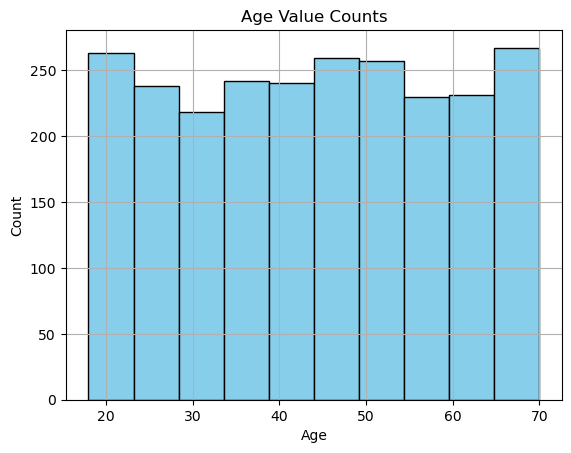

In [1106]:
consumer_df['Age'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Age Value Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

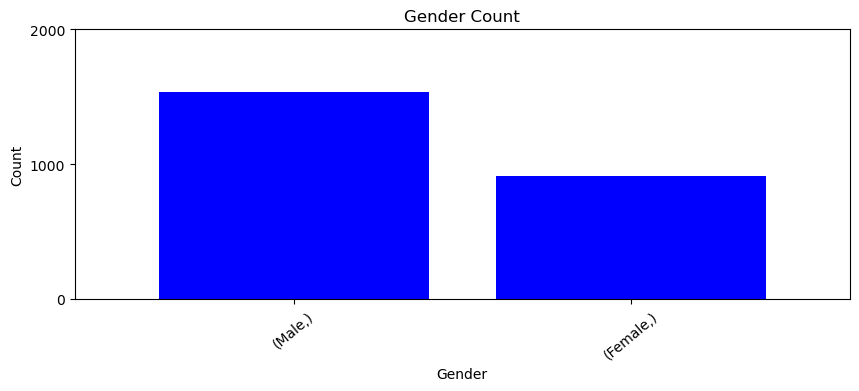

In [1107]:
gender_df = consumer_data_df[["Gender"]]

gender_count = gender_df.value_counts()

fav_genre_chart = gender_count.plot.bar(y='Count', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,2000),
                                    title='Gender Count',
                                    yticks=[0,1000,2000], xlabel='Gender', ylabel='Count', color='blue')

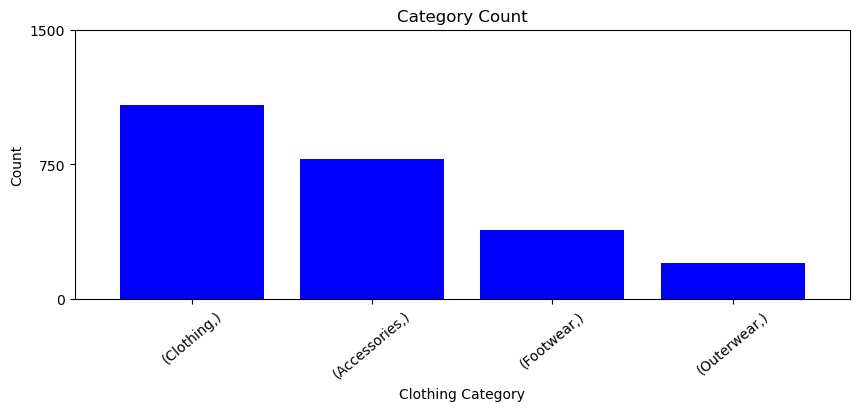

In [1108]:
category_df = consumer_data_df[["Category"]]

category_count = category_df.value_counts()

fav_genre_chart = category_count.plot.bar(y='Category', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,1500),
                                    title='Category Count',
                                    yticks=[0,750,1500], xlabel='Clothing Category', ylabel='Count', color='blue')

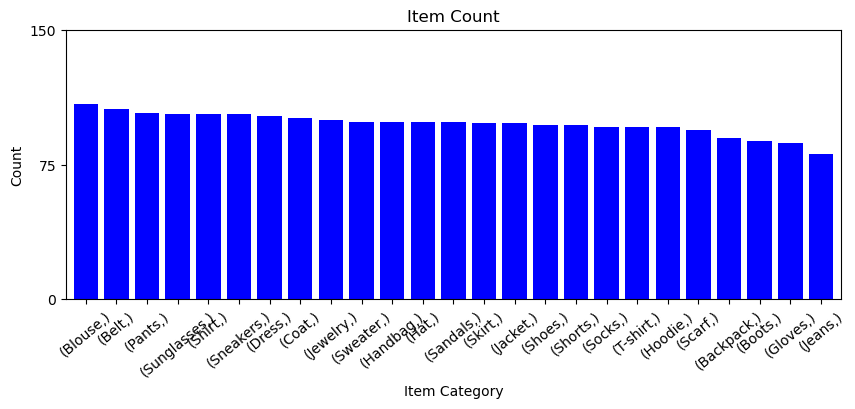

In [1109]:
item_df = consumer_data_df[["Item_Purchased"]]

item_count = item_df.value_counts()

fav_genre_chart = item_count.plot.bar(y='Item', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,150),
                                    title='Item Count',
                                    yticks=[0,75,150], xlabel='Item Category', ylabel='Count', color='blue')

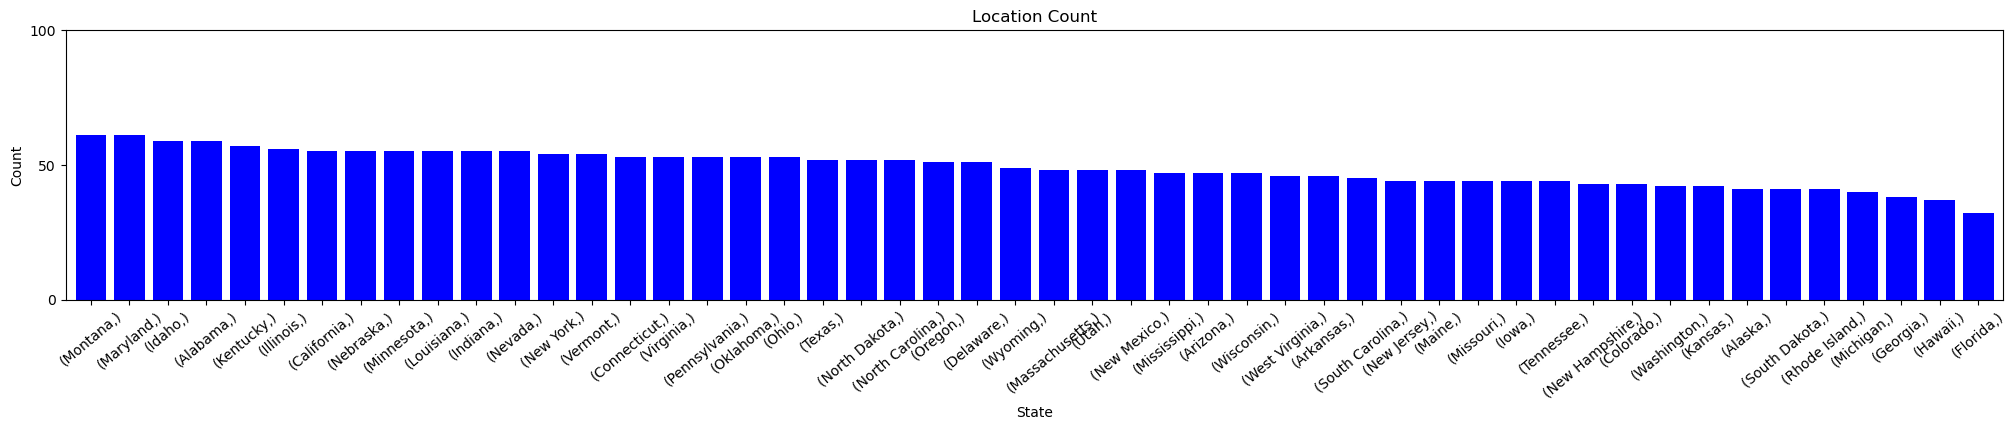

In [1110]:
location_df = consumer_data_df[["Location"]]

location_count = location_df.value_counts()

fav_genre_chart = location_count.plot.bar(y='Location', rot=40, width=0.8, figsize=(25,3.5), ylim=(0,100),
                                    title='Location Count',
                                    yticks=[0,50,100], xlabel='State', ylabel='Count', color='blue')

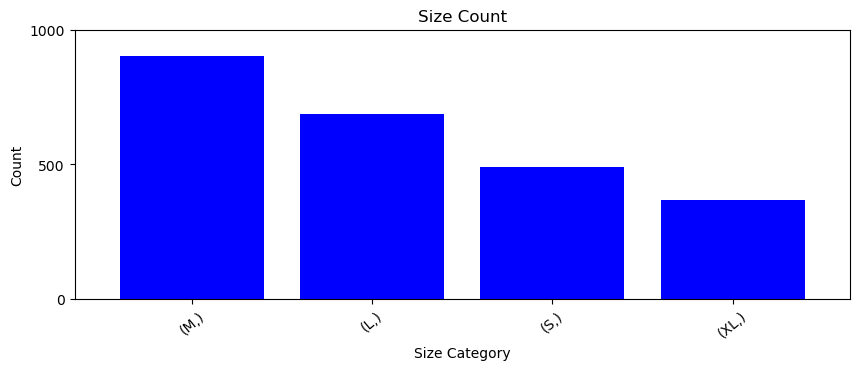

In [1111]:
size_df = consumer_data_df[["Size"]]

size_count = size_df.value_counts()

fav_genre_chart = size_count.plot.bar(y='Size', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,1000),
                                    title='Size Count',
                                    yticks=[0,500,1000], xlabel='Size Category', ylabel='Count', color='blue')

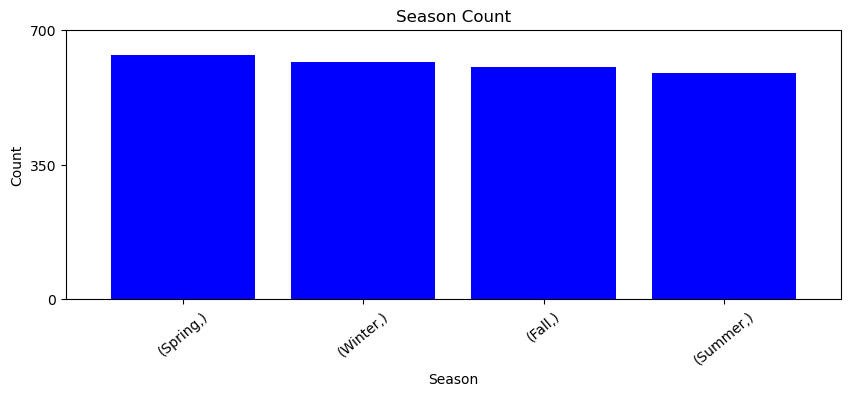

In [1112]:
season_df = consumer_data_df[["Season"]]

season_count = season_df.value_counts()

fav_genre_chart = season_count.plot.bar(y='Season', rot=40, width=0.8, figsize=(10,3.5), ylim=(0,700),
                                    title='Season Count',
                                    yticks=[0,350,700], xlabel='Season', ylabel='Count', color='blue')

### Standard Scaler - Prepare the Data

In [1113]:
#Create DataFrame for Standard Scaler
consumer_df_SS = consumer_df.copy()
consumer_df_SS = consumer_df_SS.drop(columns=['Customer_ID','Category_ID', 'Item_Purchased_ID', 'Location', 'Size', 'Color','Sku_ID', 'Season','Shipping_Type','Discount_Applied','Frequency of Purchases'])
consumer_df_SS.head()

,Age,Gender,Category,Item_Purchased,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases
0,55,1,Clothing,Blouse,53,3.1,1,14
1,19,1,Clothing,Sweater,64,3.1,1,2
2,50,1,Clothing,Jeans,73,3.1,1,23
3,21,1,Footwear,Sandals,90,3.5,1,49
4,45,1,Clothing,Blouse,49,2.7,1,31


In [1114]:
# Use the StandardScaler module and fit_transform function to 
# scale all columns with numerical values
rate_df_scaled = StandardScaler().fit_transform(consumer_df_SS[["Age", "Gender", "Purchase_Amount (USD)","Review_Rating","Subscription Status","Previous_Purchases"]])

# Diplay the first five rows of the scaled data
rate_df_scaled[0:5]

array([[ 0.71729538, -0.76995706, -0.2923183 , -0.91670065, -1.39364209,
        -0.78043318],
       [-1.65527008, -0.76995706,  0.17376545, -0.91670065, -1.39364209,
        -1.6106692 ],
       [ 0.3877724 , -0.76995706,  0.5551067 , -0.91670065, -1.39364209,
        -0.15775616],
       [-1.52346088, -0.76995706,  1.27541796, -0.35454036, -1.39364209,
         1.64108855],
       [ 0.05824942, -0.76995706, -0.4618033 , -1.47886094, -1.39364209,
         0.39573452]])

In [1115]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step
rate_df_scaled = pd.DataFrame(
    rate_df_scaled,
    columns=["Age", "Gender", "Purchase_Amount (USD)","Review_Rating","Subscription Status","Previous_Purchases"])
rate_df_scaled

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases
0,0.717295,-0.769957,-0.292318,-0.916701,-1.393642,-0.780433
1,-1.655270,-0.769957,0.173765,-0.916701,-1.393642,-1.610669
2,0.387772,-0.769957,0.555107,-0.916701,-1.393642,-0.157756
3,-1.523461,-0.769957,1.275418,-0.354540,-1.393642,1.641089
4,0.058249,-0.769957,-0.461803,-1.478861,-1.393642,0.395735
...,...,...,...,...,...,...
2440,-0.271274,1.298774,-1.351600,0.629240,0.717544,0.464921
2441,0.519582,1.298774,-0.461803,1.050860,0.717544,1.087598
2442,0.124154,1.298774,-1.139743,-1.197781,0.717544,-0.088570
2443,-0.007655,1.298774,0.724592,0.067080,0.717544,-0.088570


In [1116]:
# Encode (convert to dummy variables) the "Item_Purchased" column
item_encoded = pd.get_dummies(consumer_df_SS['Item_Purchased'])

# Review the DataFrame
item_encoded.head()

,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1117]:
# Encode (convert to dummy variables) the "Category" column
category_encoded = pd.get_dummies(consumer_df_SS["Category"])

# Review the DataFrame
category_encoded.head()

,Accessories,Clothing,Footwear,Outerwear
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,False,True,False
4,False,True,False,False


In [1118]:
# Concatenate the scaled data DataFrame with the "Category" and "Item_Category" encoded dummies 
rate_df_scaled = pd.concat([rate_df_scaled, category_encoded, item_encoded], axis=1)

# Display the combined DataFrame.
rate_df_scaled.head()

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases,Accessories,Clothing,Footwear,Outerwear,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
0,0.717295,-0.769957,-0.292318,-0.916701,-1.393642,-0.780433,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-1.655270,-0.769957,0.173765,-0.916701,-1.393642,-1.610669,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0.387772,-0.769957,0.555107,-0.916701,-1.393642,-0.157756,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.523461,-0.769957,1.275418,-0.354540,-1.393642,1.641089,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0.058249,-0.769957,-0.461803,-1.478861,-1.393642,0.395735,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1181]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 20))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(rate_df_scaled)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,18658.867894
1,2,15455.599188
2,3,13755.099810
3,4,13029.220787
4,5,12453.279103
5,6,11870.626170
6,7,11521.719126
7,8,11198.823041
8,9,10839.236291
9,10,10432.464525


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

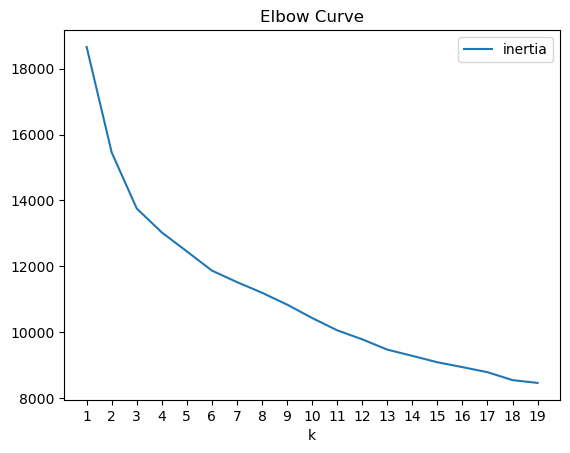

In [1182]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

### Fit and Predict with KMeans

In [1119]:
# Initialize the K-Means model; n_clusters=4 and n_init='auto'
model = KMeans(n_clusters=3, n_init='auto')

In [1120]:
# Fit the model
model.fit(rate_df_scaled)

KMeans(n_clusters=3)

In [1121]:
# Predict the model segments (clusters)
customer_segments = model.predict(rate_df_scaled)

# View the customer segments
print(customer_segments)

[1 1 1 ... 2 2 2]


In [1122]:
# Create a copy of the concatenated DataFrame
rate_scaled_predictions = rate_df_scaled.copy()

# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
rate_scaled_predictions["ProductPruchaserCluster"] = customer_segments

# Review the DataFrame
rate_scaled_predictions.head()

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases,Accessories,Clothing,Footwear,Outerwear,...,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt,ProductPruchaserCluster
0,0.717295,-0.769957,-0.292318,-0.916701,-1.393642,-0.780433,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
1,-1.655270,-0.769957,0.173765,-0.916701,-1.393642,-1.610669,False,True,False,False,...,False,False,False,False,False,False,False,True,False,1
2,0.387772,-0.769957,0.555107,-0.916701,-1.393642,-0.157756,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
3,-1.523461,-0.769957,1.275418,-0.354540,-1.393642,1.641089,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1
4,0.058249,-0.769957,-0.461803,-1.478861,-1.393642,0.395735,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1


### Plot and Analyze the Results

In [1123]:
# Group the saved DataFrame by cluster using `groupby` to calculate average currency returns
rate_scaled_predictions.groupby(by=['ProductPruchaserCluster'])['Purchase_Amount (USD)'].mean()

ProductPruchaserCluster
0    0.098087
1   -0.043343
2   -0.052895
Name: Purchase_Amount (USD), dtype: float64

<Axes: xlabel='Purchase_Amount (USD)', ylabel='Age'>

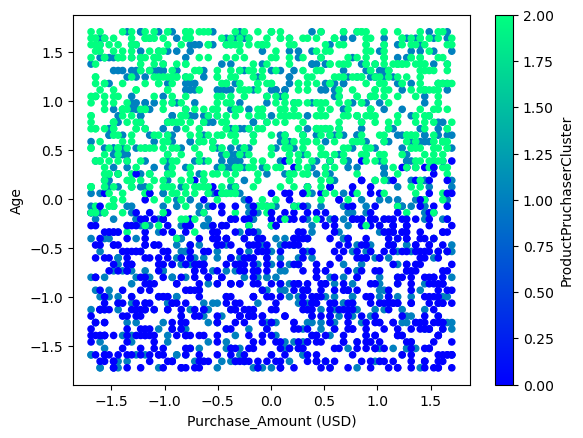

In [1124]:
# Create a scatter plot of the interest differential and next months currency return.
rate_scaled_predictions.plot.scatter(
    x="Purchase_Amount (USD)",
    y="Age",
    c="ProductPruchaserCluster",
    colormap='winter')

### Birch

In [1125]:
# Initialize a Birch model with n_clusters=5
birch_model = Birch(n_clusters=3)

# Fit the model for the rate_df_scaled DataFrame
birch_model.fit(rate_df_scaled)

# Predict the model segments (clusters)
segment_clusters = birch_model.predict(rate_df_scaled)

# View the stock segments
print(segment_clusters)

[1 1 1 ... 0 0 0]


In [1126]:
# Create a copy of the concatenated DataFrame
rate_scaled_predictions = rate_df_scaled.copy()

# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
rate_scaled_predictions["ProductPruchaserCluster"] = segment_clusters

# Review the DataFrame
rate_scaled_predictions.head()

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases,Accessories,Clothing,Footwear,Outerwear,...,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt,ProductPruchaserCluster
0,0.717295,-0.769957,-0.292318,-0.916701,-1.393642,-0.780433,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
1,-1.655270,-0.769957,0.173765,-0.916701,-1.393642,-1.610669,False,True,False,False,...,False,False,False,False,False,False,False,True,False,1
2,0.387772,-0.769957,0.555107,-0.916701,-1.393642,-0.157756,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
3,-1.523461,-0.769957,1.275418,-0.354540,-1.393642,1.641089,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1
4,0.058249,-0.769957,-0.461803,-1.478861,-1.393642,0.395735,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1


<Axes: xlabel='Purchase_Amount (USD)', ylabel='Age'>

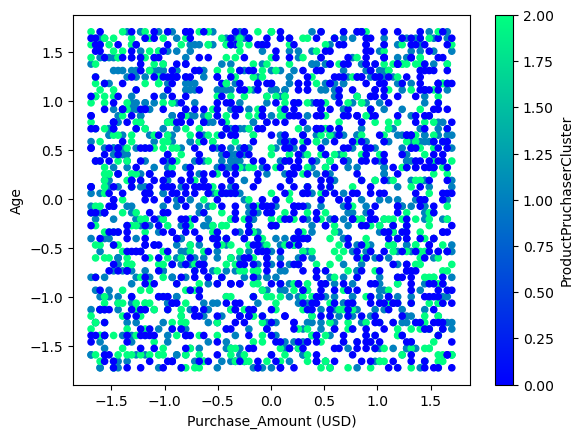

In [1127]:
# Create a scatter plot of the interest differential and next months currency return.
rate_scaled_predictions.plot.scatter(
    x="Purchase_Amount (USD)",
    y="Age",
    c="ProductPruchaserCluster",
    colormap='winter')

## Segmenting Customers

In [1128]:
#Create DataFrame
consumer_df_CS = consumer_df.copy()
consumer_df_CS = consumer_df_CS.drop(columns=['Category', 'Item_Purchased','Customer_ID','Category_ID', 'Item_Purchased_ID', 'Location', 'Size', 'Color','Sku_ID', 'Season','Shipping_Type','Discount_Applied','Frequency of Purchases'])
consumer_df_CS.head()

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases
0,55,1,53,3.1,1,14
1,19,1,64,3.1,1,2
2,50,1,73,3.1,1,23
3,21,1,90,3.5,1,49
4,45,1,49,2.7,1,31


In [1129]:
# Scaling the numeric columns
cs_data_scaled = StandardScaler().fit_transform(consumer_df_CS[["Purchase_Amount (USD)", "Previous_Purchases"]])

# Review the scaled data
cs_data_scaled

array([[-0.2923183 , -0.78043318],
       [ 0.17376545, -1.6106692 ],
       [ 0.5551067 , -0.15775616],
       ...,
       [-1.13974331, -0.08856983],
       [ 0.7245917 , -0.08856983],
       [ 0.8940767 ,  0.53410719]])

In [1130]:
# Create a DataFrame of the scaled data
cs_data_scaled = pd.DataFrame(cs_data_scaled, columns=["Purchase_Amount (USD)", "Previous_Purchases"])

# Replace the original data with the columns of information from the scaled Data
consumer_df_CS["Purchase_Amount (USD)"] = cs_data_scaled["Purchase_Amount (USD)"]
consumer_df_CS["Previous_Purchases"] = cs_data_scaled["Previous_Purchases"]

# Review the DataFrame
consumer_df_CS.head()

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases
0,55,1,-0.292318,3.1,1,-0.780433
1,19,1,0.173765,3.1,1,-1.610669
2,50,1,0.555107,3.1,1,-0.157756
3,21,1,1.275418,3.5,1,1.641089
4,45,1,-0.461803,2.7,1,0.395735


In [1131]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(consumer_df_CS)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,570168.762519
1,2,147846.664230
2,3,72436.463047
3,4,42009.816738
4,5,32569.863149
5,6,24113.632821
6,7,19214.260878
7,8,16085.828131
8,9,14368.794306
9,10,12758.824674


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

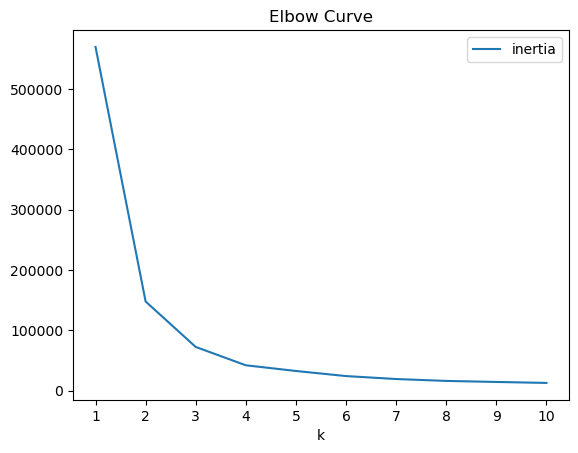

In [1132]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [1227]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=3)

# Fit the model
model.fit(consumer_df_CS)

# Make predictions
kmeans_predictions = model.predict(consumer_df_CS)

In [1228]:
# Fit a AgglomerativeClustering Model with three clusters
agglo_model = AgglomerativeClustering(n_clusters=4)

# Make predictions with the AgglomerativeClustering model
agglo_predictions = agglo_model.fit_predict(consumer_df_CS)

# Previewing the predicted customer classifications for AgglomerativeClustering
agglo_predictions[-10:]

array([1, 1, 3, 3, 0, 3, 1, 1, 3, 1], dtype=int64)

In [1229]:
# Fit a Birch Model with three clusters.
birch_model = Birch(n_clusters=4)
birch_model.fit(consumer_df_CS)

# Make predictions with the Birch model
birch_predictions = birch_model.predict(consumer_df_CS)

# Previewing the predicted customer classifications for BIRCH
birch_predictions[-10:]

array([0, 1, 0, 0, 2, 0, 3, 0, 0, 3], dtype=int64)

In [1230]:
# Create a copy of the preprocessed data
ccinfo_predictions_df = consumer_df_CS.copy()
# Add class columns with the labels to the new DataFrame
ccinfo_predictions_df["kmeans-segments"] = kmeans_predictions
ccinfo_predictions_df["agglomerative-segments"] = agglo_predictions
ccinfo_predictions_df["birch-segments"] = birch_predictions
ccinfo_predictions_df[['kmeans-segments','agglomerative-segments', 'birch-segments']].head(3)

,kmeans-segments,agglomerative-segments,birch-segments
0,0,1,3
1,2,0,2
2,0,1,3


<Axes: xlabel='Previous_Purchases', ylabel='Age'>

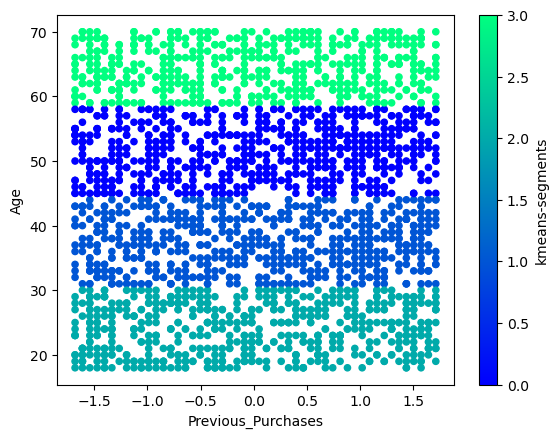

In [1231]:
# Plot the kmeans clusters using the limit_bal and age columns. 
ccinfo_predictions_df.plot.scatter(
    x="Previous_Purchases",
    y="Age",
    c="kmeans-segments",
    colormap="winter")

<Axes: xlabel='Previous_Purchases', ylabel='Age'>

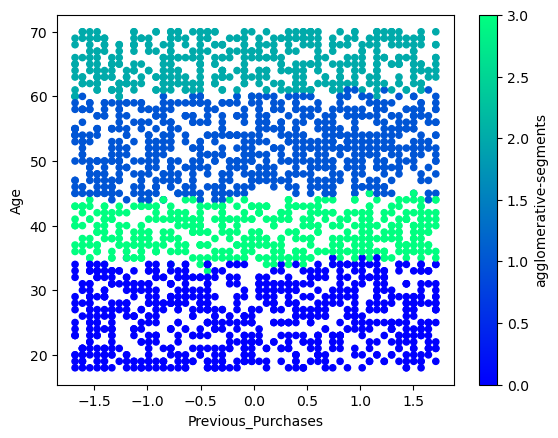

In [1232]:
# Plot the agglomerative clusters using the limit_bal and age columns. 
ccinfo_predictions_df.plot.scatter(
    x="Previous_Purchases",
    y="Age",
    c="agglomerative-segments",
    colormap="winter")

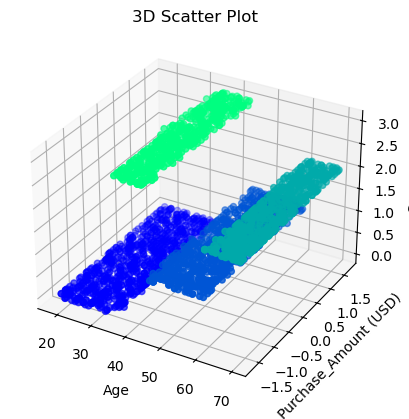

In [1295]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ccinfo_predictions_df['Age'], ccinfo_predictions_df['Purchase_Amount (USD)'], ccinfo_predictions_df['agglomerative-segments'], c=ccinfo_predictions_df['agglomerative-segments'], marker='o',cmap='winter')

ax.set_title('3D Scatter Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Purchase_Amount (USD)')
ax.set_zlabel('Segment')

plt.show()

<Axes: xlabel='Previous_Purchases', ylabel='Age'>

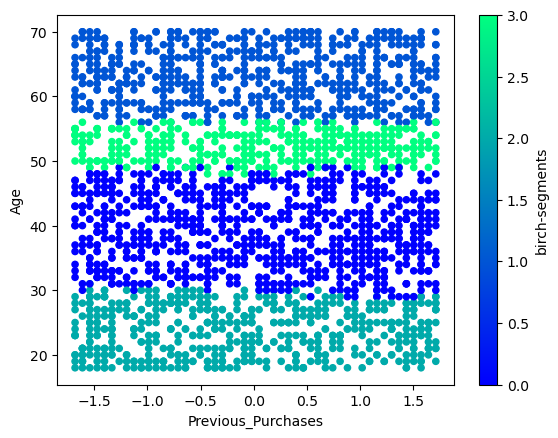

In [1233]:
# Plot the birch clusters using the limit_bal and age columns. 
ccinfo_predictions_df.plot.scatter(
    x="Previous_Purchases",
    y="Age",
    c="birch-segments",
    colormap="winter")

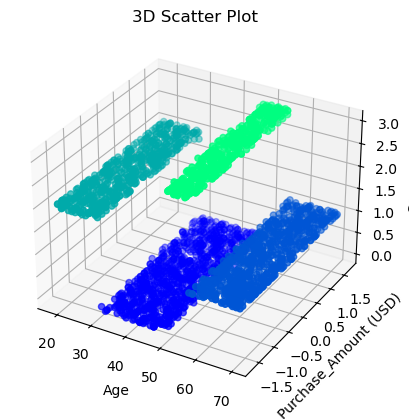

In [1296]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ccinfo_predictions_df['Age'], ccinfo_predictions_df['Purchase_Amount (USD)'], ccinfo_predictions_df['birch-segments'], c=ccinfo_predictions_df['birch-segments'], marker='o',cmap='winter')

ax.set_title('3D Scatter Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Purchase_Amount (USD)')
ax.set_zlabel('Segment')

plt.show()

In [1234]:
# Create a list to store values and the values of k
score_kmeans = []
score_agglomerative = []
score_birch = []

# Create a list to set the range of k values to test
k = list(range(2, 11))

In [1235]:
from sklearn import metrics
# For each model, we iterate through the different cluster count (`i`). 
# Then, calculate the variance ratio for each algorithm, given that specified cluster count.

for i in k:
    # Kmeans variance and score
    k_model = KMeans(n_clusters=i, n_init='auto',random_state=0)
    k_model.fit(consumer_df_CS)
    labels = k_model.labels_
    score = metrics.calinski_harabasz_score(consumer_df_CS, labels)    
    score_kmeans.append(score)
    
    # AgglomerativeClustering variance and score
    agglo_model = AgglomerativeClustering(n_clusters=i)
    agglo_predictions = agglo_model.fit_predict(consumer_df_CS)
    labels = agglo_model.labels_
    score = metrics.calinski_harabasz_score(consumer_df_CS, labels)    
    score_agglomerative.append(score)    
    
    # Birch variance and score
    birch_model = Birch(n_clusters=i)
    birch_model.fit(consumer_df_CS)
    labels = birch_model.labels_
    score = metrics.calinski_harabasz_score(consumer_df_CS, labels)    
    score_birch.append(score)

In [1236]:
# Display the scores. 
display(score_kmeans)
display(score_agglomerative)
display(score_birch)

[6978.398136289863,
 8389.851079077165,
 10229.640647146727,
 10068.673826467078,
 11046.269728394263,
 11651.303195346829,
 11991.92321979372,
 11778.377970767358,
 11820.08212049268]

[4252.978593749149,
 5933.474362692321,
 8801.973940167103,
 9093.154235321881,
 10648.574279037697,
 10194.919461832023,
 10078.635416642146,
 10221.155078926042,
 10395.093932440412]

[6258.811767957626,
 7380.056101985484,
 8120.389831885397,
 9278.313836621131,
 9881.0879816907,
 10350.797313779785,
 10961.317212918762,
 10378.378773844566,
 10000.121276867076]

## PCA

In [1237]:
# Instantiate the PCA instance and declare the number of PCA variables
pca=PCA(n_components=6)

In [1298]:
consumer_df_CS.head()

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases
0,55,1,-0.292318,3.1,1,-0.780433
1,19,1,0.173765,3.1,1,-1.610669
2,50,1,0.555107,3.1,1,-0.157756
3,21,1,1.275418,3.5,1,1.641089
4,45,1,-0.461803,2.7,1,0.395735


In [1299]:
# Fit the PCA model on the transformed credit card DataFrame
customers_pca = pca.fit_transform(consumer_df_CS)

# Review the first 5 rows of the array of list data
customers_pca[:5]

array([[-10.88407517,   0.31254314,  -0.76417026,  -0.6588192 ,
          0.72582204,  -0.21621473],
       [ 25.11742683,   1.16705125,  -1.01008982,  -0.73737284,
          0.76198   ,  -0.23173654],
       [ -5.8840771 ,   0.45783018,   0.27678332,  -0.69260725,
          0.72016996,  -0.2132351 ],
       [ 23.11481364,  -0.35290849,   2.06818901,  -0.36147157,
          0.66611072,  -0.20857876],
       [ -0.88659559,  -0.66638526,  -0.06355568,  -1.06729096,
          0.64612204,  -0.20460522]])

In [1300]:
# Calculate the PCA explained variance ratio
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [1301]:
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    customers_pca,
    columns=["PCA1", "PCA2","PCA3", "PCA4","PCA5", "PCA6",]
)

# Review the PCA DataFrame
ccinfo_pca_df.head(10)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-10.884075,0.312543,-0.764170,-0.658819,0.725822,-0.216215
1,25.117427,1.167051,-1.010090,-0.737373,0.761980,-0.231737
2,-5.884077,0.457830,0.276783,-0.692607,0.720170,-0.213235
3,23.114814,-0.352908,2.068189,-0.361472,0.666111,-0.208579
4,-0.886596,-0.666385,-0.063556,-1.067291,0.646122,-0.204605
5,-1.885885,-0.689681,-1.759725,-0.829995,0.673012,-0.214321
6,-18.885803,-0.436139,1.903013,-0.582125,0.663632,-0.196682
7,17.114719,-0.544359,-1.084895,-0.580965,0.680225,-0.218902
8,18.117426,1.856446,0.263074,-1.267605,0.764030,-0.224498
9,-12.881072,0.188076,-1.877348,1.069775,0.806896,-0.234897


In [1302]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(ccinfo_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,570168.762519
1,2,147942.780196
2,3,72854.146766
3,4,42103.935196
4,5,31546.355567


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

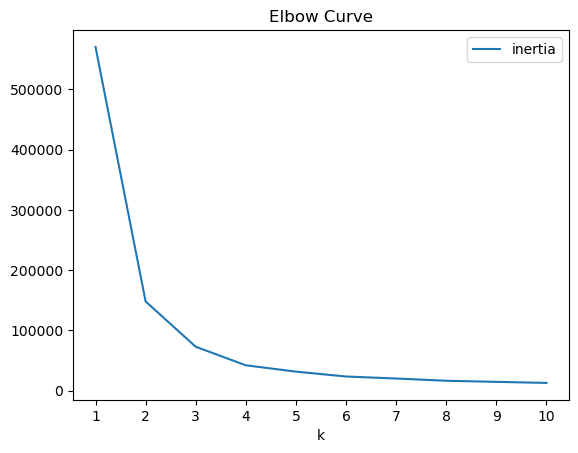

In [1303]:
# Plot the Elbow Curve
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [1304]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 74.05%
Percentage decrease from k=2 to k=3: 50.76%
Percentage decrease from k=3 to k=4: 42.21%
Percentage decrease from k=4 to k=5: 25.08%
Percentage decrease from k=5 to k=6: 25.49%
Percentage decrease from k=6 to k=7: 14.20%
Percentage decrease from k=7 to k=8: 18.47%
Percentage decrease from k=8 to k=9: 11.01%
Percentage decrease from k=9 to k=10: 12.16%


In [1307]:
# Define the model with 3 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=0)

# Fit the model
model.fit(ccinfo_pca_df)

# Make predictions
k_3 = model.predict(ccinfo_pca_df)

# Create a copy of the PCA DataFrame
ccinfo_pca_predictions_df = ccinfo_pca_df.copy()

# Add a class column with the labels
ccinfo_pca_predictions_df["customer_segments"] = k_3

<Axes: xlabel='PCA1', ylabel='PCA2'>

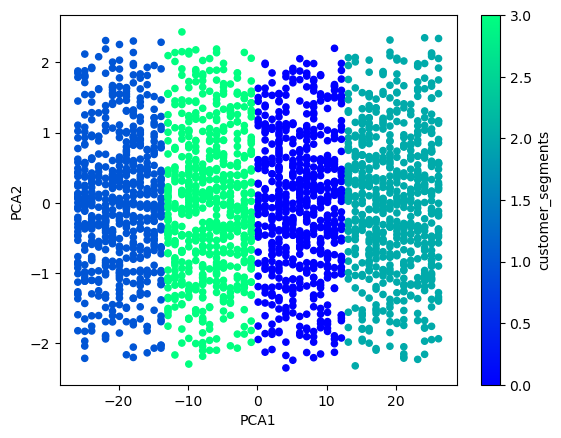

In [1308]:
# Plot the clusters
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='winter')

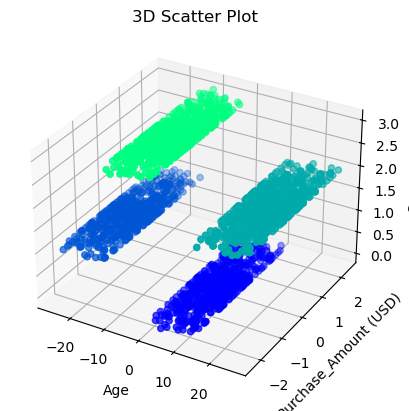

In [1309]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ccinfo_pca_predictions_df['PCA1'], ccinfo_pca_predictions_df['PCA2'], ccinfo_pca_predictions_df['customer_segments'], c=ccinfo_pca_predictions_df['customer_segments'], marker='o',cmap='winter')

ax.set_title('3D Scatter Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Purchase_Amount (USD)')
ax.set_zlabel('Segment')

plt.show()

<Axes: xlabel='PCA3', ylabel='PCA4'>

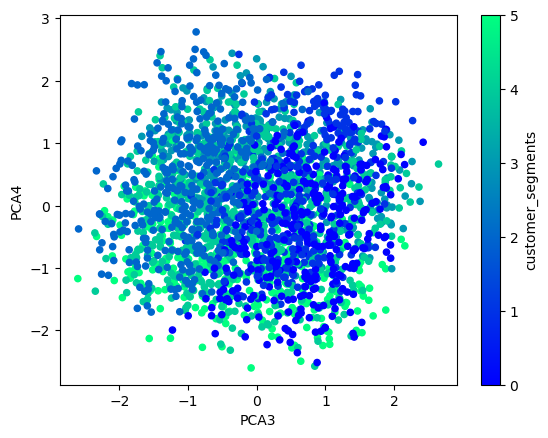

In [1246]:
# Plot the clusters
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA3",
    y="PCA4",
    c="customer_segments",
    colormap='winter')

<Axes: xlabel='PCA5', ylabel='PCA6'>

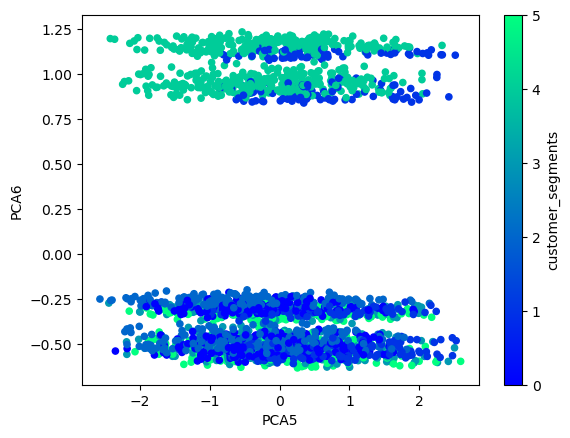

In [1247]:
# Plot the clusters
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA5",
    y="PCA6",
    c="customer_segments",
    colormap='winter')

In [1248]:
# What columns contribute the most to the explained variance?
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.20490043, 0.13815444, 0.13092121, 0.12902592, 0.12526568,
       0.05875898])

In [1249]:
# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. FYI: The data has already been scaled and fitted.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2','PCA3', 'PCA4','PCA5', 'PCA6'], index=rate_df_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
Age,-0.004061,-0.641097,-0.221060,-0.263702,0.685536,0.012143
Gender,-0.698687,-0.073253,-0.052404,0.053364,-0.056852,-0.695540
Purchase_Amount (USD),-0.075122,0.399253,-0.310833,-0.857154,-0.056814,-0.005300
Review_Rating,-0.039705,0.605820,-0.361800,0.377181,0.594685,-0.005799
Subscription Status,-0.701671,-0.036314,-0.025361,0.052929,-0.038194,0.695683
Previous_Purchases,0.109472,-0.233028,-0.847953,0.216152,-0.408106,0.028815
Accessories,0.006318,0.011824,-0.013233,0.014492,0.016453,-0.091185
Clothing,-0.006415,-0.026185,0.019557,-0.023540,-0.027497,0.133274
Footwear,-0.001276,0.015356,-0.009692,0.002689,0.012220,-0.035547
Outerwear,0.001373,-0.000995,0.003368,0.006359,-0.001176,-0.006541


## KMeans - KDK

In [1272]:
consumer_df_kmeans = consumer_df.copy()
consumer_df_kmeans = consumer_df_kmeans.drop(columns=['Customer_ID', 'Category','Category_ID', 'Item_Purchased', 'Item_Purchased_ID', 'Location', 'Size', 'Color','Sku_ID', 'Season','Shipping_Type','Discount_Applied','Frequency of Purchases'])

# Scaling the numeric columns
cs_data_scaled = StandardScaler().fit_transform(consumer_df_kmeans[["Purchase_Amount (USD)", "Previous_Purchases"]])

# Create a DataFrame of the scaled data
cs_data_scaled = pd.DataFrame(cs_data_scaled, columns=["Purchase_Amount (USD)", "Previous_Purchases"])

# Replace the original data with the columns of information from the scaled Data
consumer_df_kmeans["Purchase_Amount (USD)"] = cs_data_scaled["Purchase_Amount (USD)"]
consumer_df_kmeans["Previous_Purchases"] = cs_data_scaled["Previous_Purchases"]

consumer_df_kmeans_2 = consumer_df_kmeans.copy()
consumer_df_kmeans.head()

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases
0,55,1,-0.292318,3.1,1,-0.780433
1,19,1,0.173765,3.1,1,-1.610669
2,50,1,0.555107,3.1,1,-0.157756
3,21,1,1.275418,3.5,1,1.641089
4,45,1,-0.461803,2.7,1,0.395735


In [1273]:
# Initialize the K-Means model; n_clusters=4 and n_init='auto'
model_k4 = KMeans(n_clusters=4, n_init='auto')

In [1274]:
# Fit the model
model_k4.fit(consumer_df_kmeans)

KMeans(n_clusters=4)

In [1275]:
# Predict the model segments (clusters)
customer_segments_k4 = model_k4.predict(consumer_df_kmeans)

# View the customer segments
print(customer_segments_k4)

[1 0 1 ... 1 3 1]


In [1276]:
# Initialize the K-Means model; n_clusters=3 and n_init='auto'
model_k3 = KMeans(n_clusters=3, n_init='auto')

In [1277]:
# Fit the model
model_k3.fit(consumer_df_kmeans)

KMeans(n_clusters=3)

In [1278]:
# Predict the model segments (clusters)
customer_segments_k3 = model_k3.predict(consumer_df_kmeans)

# View the customer segments
print(customer_segments_k3)

[0 1 2 ... 2 2 0]


In [1279]:
# Create a copy of the original DataFrame and name it as customer_predictions
customer_predictions = consumer_df_kmeans.copy()

In [1280]:
# Create a new column in the DataFrame with the predicted clusters with k=4
customer_predictions["Customer Segment (k=4)"] = customer_segments_k4

In [1281]:
# Create a new column in the DataFrame with the predicted clusters with k=3
customer_predictions["Customer Segment (k=3)"] = customer_segments_k3

In [1282]:
# Review the DataFrame
customer_predictions.head()

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases,Customer Segment (k=4),Customer Segment (k=3)
0,55,1,-0.292318,3.1,1,-0.780433,1,0
1,19,1,0.173765,3.1,1,-1.610669,0,1
2,50,1,0.555107,3.1,1,-0.157756,1,2
3,21,1,1.275418,3.5,1,1.641089,0,1
4,45,1,-0.461803,2.7,1,0.395735,3,2


<Axes: title={'center': 'Scatter Plot by Shopping Segment - k=4'}, xlabel='Age', ylabel='Purchase_Amount (USD)'>

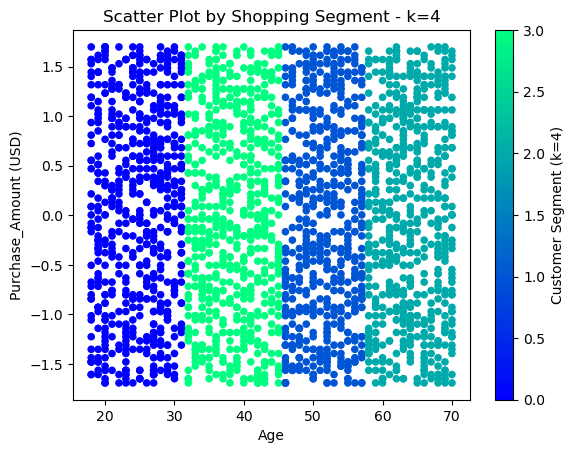

In [1283]:
# Create a scatter plot with x="Frozen" and y="Grocery" with k=2 segments
customer_predictions.plot.scatter(
    x="Age", 
    y="Purchase_Amount (USD)", 
    c="Customer Segment (k=4)",
    title = "Scatter Plot by Shopping Segment - k=4",
    colormap='winter'
)

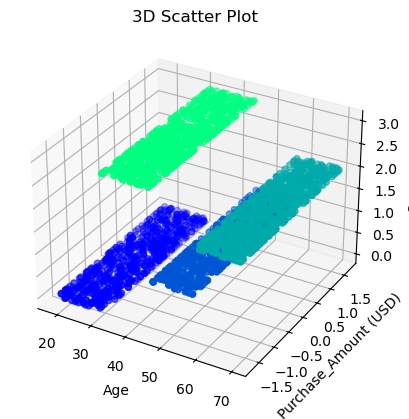

In [1294]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(customer_predictions['Age'], customer_predictions['Purchase_Amount (USD)'], customer_predictions['Customer Segment (k=4)'], c=customer_predictions['Customer Segment (k=4)'], marker='o',cmap='winter')

ax.set_title('3D Scatter Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Purchase_Amount (USD)')
ax.set_zlabel('Segment')

plt.show()

<Axes: title={'center': 'Scatter Plot by Shopping Segment - k=3'}, xlabel='Age', ylabel='Purchase_Amount (USD)'>

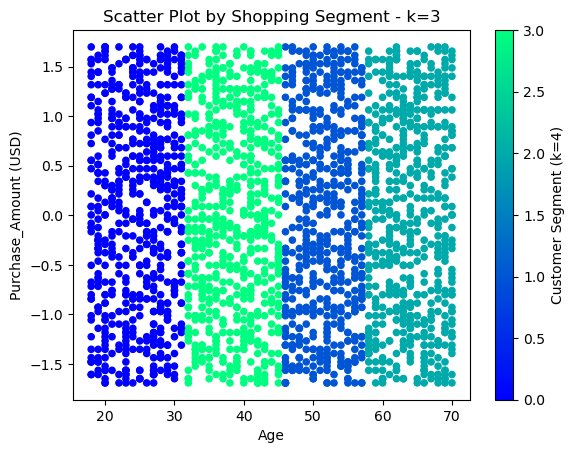

In [1285]:
# Create a scatter plot with x="Frozen" and y="Grocery" with k=4 segments
customer_predictions.plot.scatter(
    x="Age", 
    y="Purchase_Amount (USD)", 
    c="Customer Segment (k=4)",
    title = "Scatter Plot by Shopping Segment - k=3",
    colormap='winter'
)

In [1286]:
# Create an empty list to store the inertia values
inertia = []

# Create a list with the number of k-values to try
k = list(range(1, 11))

In [1287]:
# Create a for loop to compute the inertia with each possible value of k and add the values to the inertia list.
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(consumer_df_kmeans_2)
    inertia.append(model.inertia_)

In [1288]:
# Create a dictionary with the data to plot the elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the elbow curve
df_elbow_3 = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_3

,k,inertia
0,1,570168.762519
1,2,147942.780196
2,3,72854.146766
3,4,42103.935196
4,5,31546.355567
5,6,23506.333286
6,7,20167.475486
7,8,16443.004322
8,9,14633.209093
9,10,12854.300415


Percentage decrease from k=1 to k=2: 74.05%
Percentage decrease from k=2 to k=3: 50.76%
Percentage decrease from k=3 to k=4: 42.21%
Percentage decrease from k=4 to k=5: 25.08%
Percentage decrease from k=5 to k=6: 25.49%
Percentage decrease from k=6 to k=7: 14.20%
Percentage decrease from k=7 to k=8: 18.47%
Percentage decrease from k=8 to k=9: 11.01%
Percentage decrease from k=9 to k=10: 12.16%


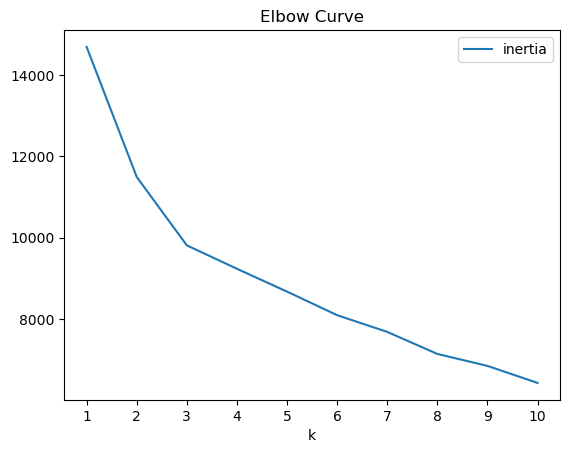

In [1289]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

# Determine the rate of decrease between each k value. 
k = elbow_data["k"]
inertia = elbow_data["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

In [1290]:
# Define the model with 3 clusters
model = KMeans(n_clusters=12, n_init='auto', random_state=1)

# Fit the model
model.fit(consumer_df_kmeans)

# Make predictions
k_3 = model.predict(consumer_df_kmeans)

# Create a copy of the DataFrame
customers_predictions_df = consumer_df_kmeans.copy()

# Add a class column with the labels
customers_predictions_df['customer_segment'] = k_3


In [1291]:
# Review the DataFrame
customers_predictions_df

,Age,Gender,Purchase_Amount (USD),Review_Rating,Subscription Status,Previous_Purchases,customer_segment
0,55,1,-0.292318,3.1,1,-0.780433,5
1,19,1,0.173765,3.1,1,-1.610669,8
2,50,1,0.555107,3.1,1,-0.157756,0
3,21,1,1.275418,3.5,1,1.641089,8
4,45,1,-0.461803,2.7,1,0.395735,10
...,...,...,...,...,...,...,...
2440,40,2,-1.351600,4.2,2,0.464921,3
2441,52,2,-0.461803,4.5,2,1.087598,5
2442,46,2,-1.139743,2.9,2,-0.088570,10
2443,44,2,0.724592,3.8,2,-0.088570,10


<Axes: title={'center': 'Scatter Plot by Shopping Segment - k=3'}, xlabel='Age', ylabel='Purchase_Amount (USD)'>

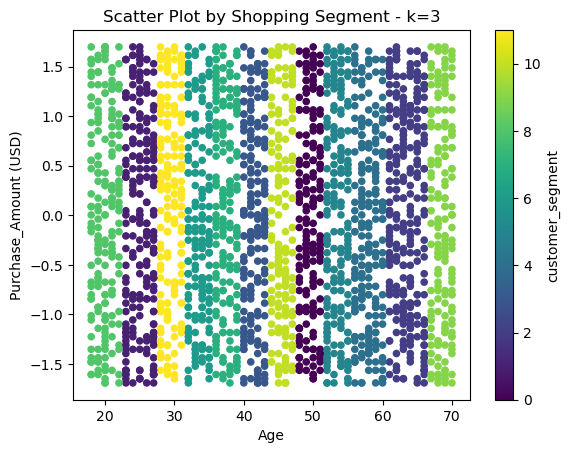

In [1292]:
# Create a scatter plot with x="Frozen" and y="Grocery" with k=4 segments
customers_predictions_df.plot.scatter(
    x="Age", 
    y="Purchase_Amount (USD)", 
    c="customer_segment",
    title = "Scatter Plot by Shopping Segment - k=3",
    colormap='viridis'
)